In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, precision_score
from matplotlib import pyplot as plt

In [65]:
from google.colab import files 
uploaded=files.upload()

Saving Emp dataset(Final1).csv to Emp dataset(Final1).csv


In [66]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Emp dataset(Final1).csv']))

In [67]:
y=df2['Attrition']
x=df2.drop('Attrition',axis=1)

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=100)

In [69]:
scaler=MinMaxScaler(feature_range =(0,1))
scaler.fit(x_train)

x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [136]:
lr=LogisticRegression().fit(x_train,y_train)

rf=RandomForestClassifier(max_depth=3, random_state=100).fit(x_train,y_train)

svcl=SVC(kernel='linear').fit(x_train,y_train)

grb = GradientBoostingClassifier(learning_rate=0.2).fit(x_train,y_train)

knn=KNeighborsClassifier(n_neighbors=40).fit(x_train,y_train)

In [137]:
ylr_train_pred=lr.predict(x_train)
ylr_test_pred=lr.predict(x_test)

yrf_train_pred=rf.predict(x_train)
yrf_test_pred=rf.predict(x_test)

ysvcl_train_pred=svcl.predict(x_train)
ysvcl_test_pred=svcl.predict(x_test)

ygrb_train_pred=grb.predict(x_train)
ygrb_test_pred=grb.predict(x_test)

yknn_train_pred=knn.predict(x_train)
yknn_test_pred=knn.predict(x_test)

In [138]:
lr_train_mse=mean_squared_error(y_train,ylr_train_pred)
lr_test_mse=mean_squared_error(y_test,ylr_test_pred)
lr_test_accr=accuracy_score(y_test,ylr_test_pred)*100
lr_test_f1s=f1_score(y_test,ylr_test_pred,average='macro')*100
lr_test_prs=precision_score(y_test,ylr_test_pred,average='macro',zero_division=0)*100

rf_train_mse=mean_squared_error(y_train,yrf_train_pred)
rf_test_mse=mean_squared_error(y_test,yrf_test_pred)
rf_test_accr=accuracy_score(y_test,yrf_test_pred)*100
rf_test_f1s=f1_score(y_test,yrf_test_pred,average='macro')*100
rf_test_prs=precision_score(y_test,yrf_test_pred,average='macro',zero_division=0)*100

svcl_train_mse=mean_squared_error(y_train,ysvcl_train_pred)
svcl_test_mse=mean_squared_error(y_test,ysvcl_test_pred)
svcl_test_accr=accuracy_score(y_test,ysvcl_test_pred)*100
svcl_test_f1s=f1_score(y_test,ysvcl_test_pred,average='macro')*100
svcl_test_prs=precision_score(y_test,ysvcl_test_pred,average='macro',zero_division=0)*100

grb_train_mse=mean_squared_error(y_train,ygrb_train_pred)
grb_test_mse=mean_squared_error(y_test,ygrb_test_pred)
grb_test_accr=accuracy_score(y_test,ygrb_test_pred)*100
grb_test_f1s=f1_score(y_test,ygrb_test_pred,average='macro')*100
grb_test_prs=precision_score(y_test,ygrb_test_pred,average='macro',zero_division=0)*100

knn_train_mse=mean_squared_error(y_train,yknn_train_pred)
knn_test_mse=mean_squared_error(y_test,yknn_test_pred)
knn_test_accr=accuracy_score(y_test,yknn_test_pred)*100
knn_test_f1s=f1_score(y_test,yknn_test_pred,average='macro')*100
knn_test_prs=precision_score(y_test,yknn_test_pred,average='macro',zero_division=0)*100


In [139]:
lr_results=pd.DataFrame(['Logistic Regression',lr_train_mse,lr_test_mse,lr_test_accr,lr_test_f1s,lr_test_prs]).transpose()
lr_results.columns=['Method','Training MSE','Test MSE','Accuracy Score','F1 score','Precision score']

rf_results=pd.DataFrame(['Random Forest',rf_train_mse,rf_test_mse,rf_test_accr,rf_test_f1s,rf_test_prs]).transpose()
rf_results.columns=['Method','Training MSE','Test MSE','Accuracy Score','F1 score','Precision score']

svcl_results=pd.DataFrame(['Linear SVM',svcl_train_mse,svcl_test_mse,svcl_test_accr,svcl_test_f1s,svcl_test_prs]).transpose()
svcl_results.columns=['Method','Training MSE','Test MSE','Accuracy Score','F1 score','Precision score']

grb_results=pd.DataFrame(['Gradient Boosting',grb_train_mse,grb_test_mse,grb_test_accr,grb_test_f1s,grb_test_prs]).transpose()
grb_results.columns=['Method','Training MSE','Test MSE','Accuracy Score','F1 score','Precision score']

knn_results=pd.DataFrame(['K Nearest Neighbor',knn_train_mse,knn_test_mse,knn_test_accr,knn_test_f1s,knn_test_prs]).transpose()
knn_results.columns=['Method','Training MSE','Test MSE','Accuracy Score','F1 score','Precision score']

In [140]:
df_models=pd.concat([lr_results, rf_results, svcl_results, grb_results, knn_results],axis=0).reset_index(drop=True)
df_models

,Method,Training MSE,Test MSE,Accuracy Score,F1 score,Precision score
0,Logistic Regression,0.140306,0.146259,85.37415,62.812178,74.033816
1,Random Forest,0.15051,0.146259,85.37415,53.839413,92.586207
2,Linear SVM,0.161565,0.159864,84.013605,45.656192,42.006803
3,Gradient Boosting,0.033163,0.159864,84.013605,64.08577,68.796992
4,K Nearest Neighbor,0.158163,0.156463,84.353741,47.824074,92.150171


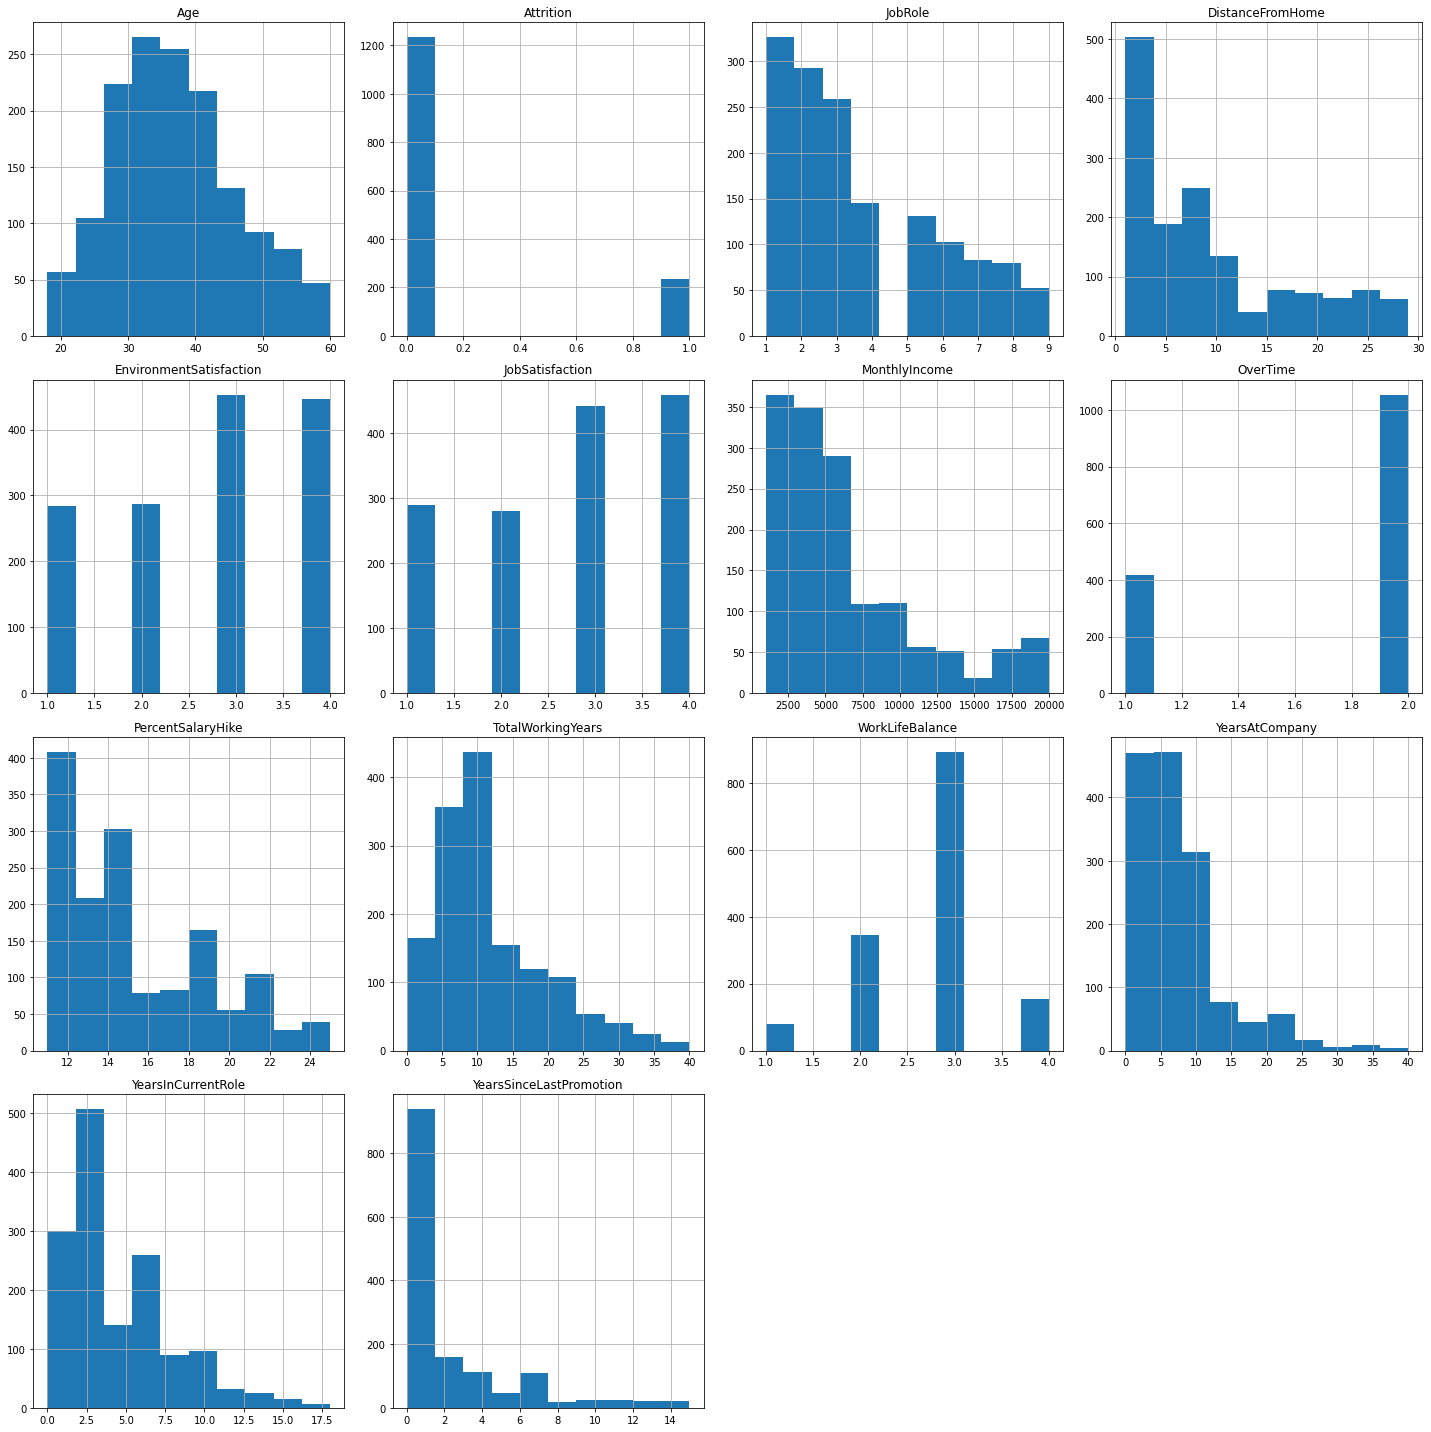

In [163]:
df2.hist(figsize=(20,20))
plt.tight_layout()
plt.show()

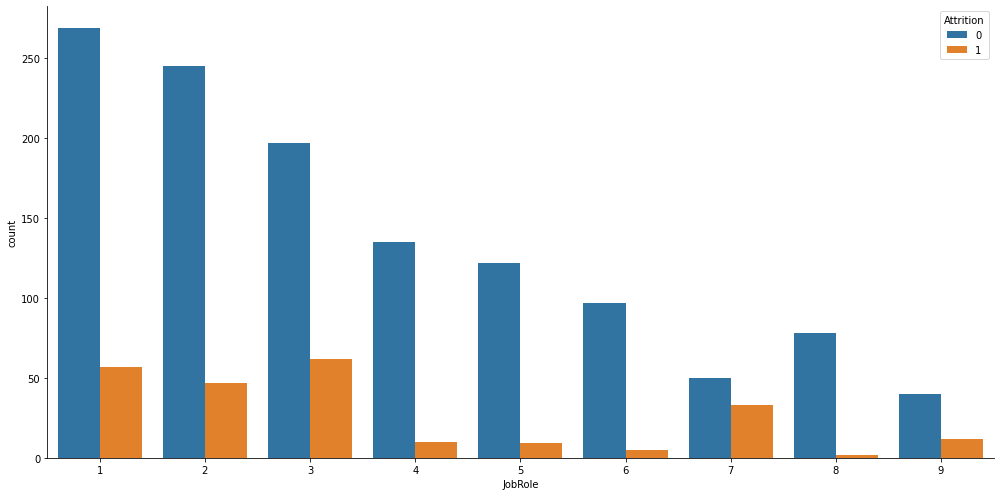

In [147]:
sns.catplot(x='JobRole',hue='Attrition', data=df2, kind="count", height=7, aspect=2, legend=False)
plt.legend(loc='upper right', title='Attrition')
plt.tight_layout()
plt.show()

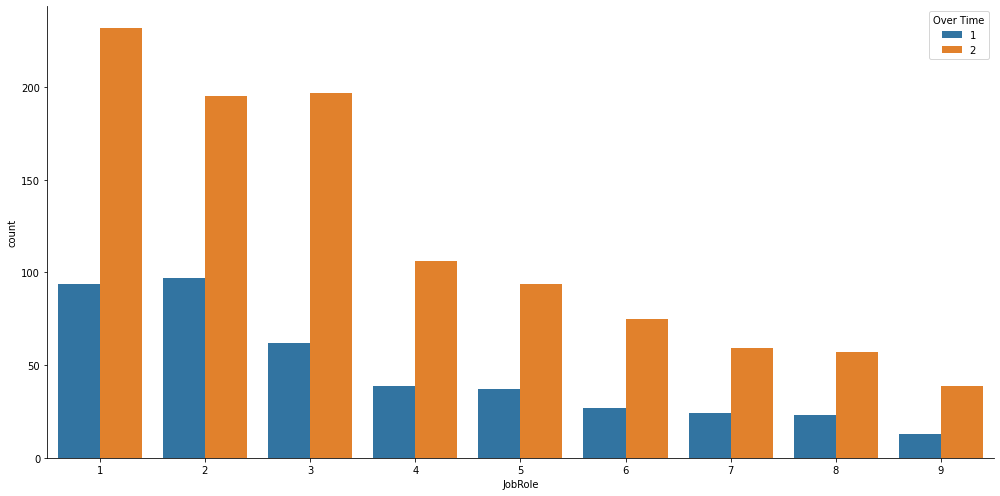

In [152]:
sns.catplot(x='JobRole',hue='OverTime', data=df2, kind="count", height=7, aspect=2, legend=False)
plt.legend(loc='upper right', title='Over Time')
plt.tight_layout()
plt.show()

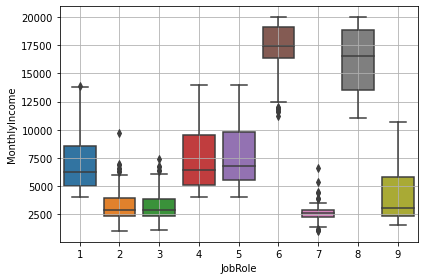

In [165]:
sns.boxplot(y=df2["MonthlyIncome"],x=df2["JobRole"])
plt.grid(True)
plt.tight_layout()
plt.show()

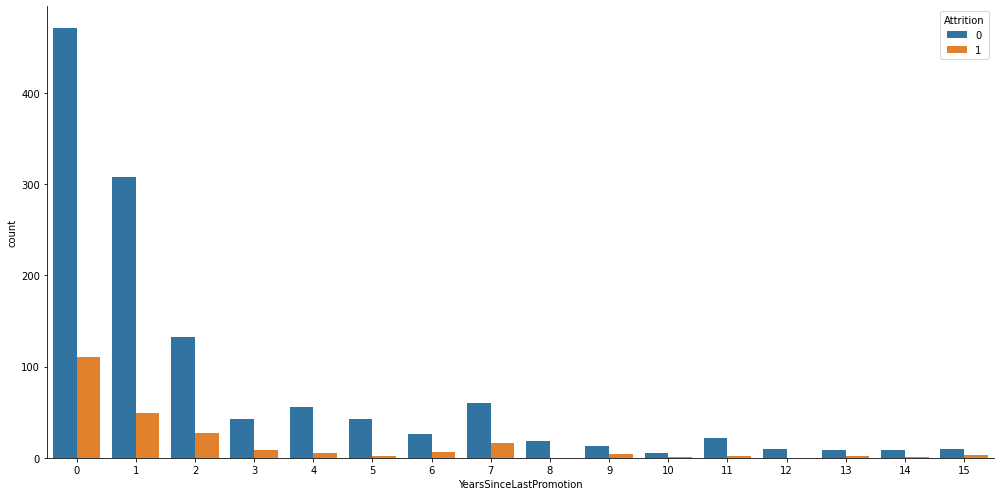

In [150]:
sns.catplot(x='YearsSinceLastPromotion',hue='Attrition', data=df2, kind="count", height=7, aspect=2, legend=False)
plt.legend(loc='upper right', title='Attrition')
plt.tight_layout()
plt.show()

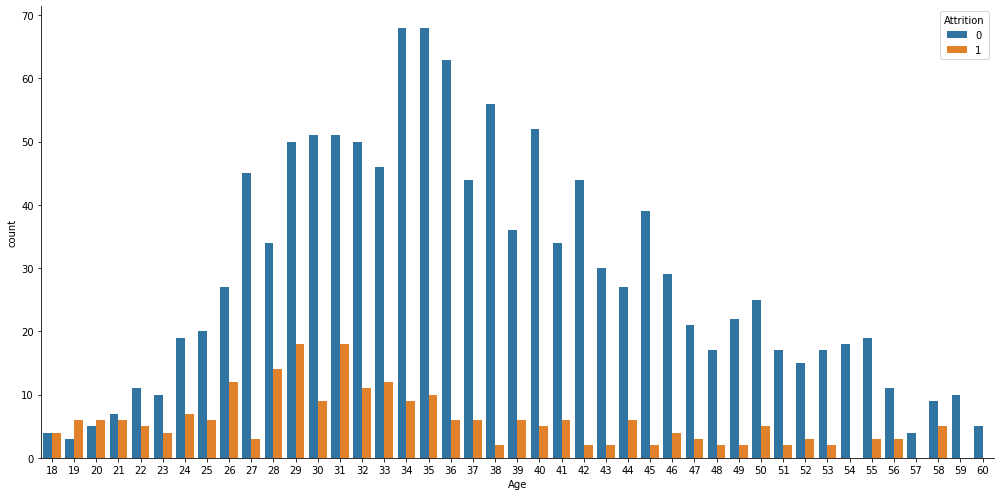

In [157]:
sns.catplot(x='Age',hue='Attrition', data=df2, kind="count", height=7, aspect=2, legend=False)
plt.legend(loc='upper right', title='Attrition')
plt.tight_layout()
plt.show()

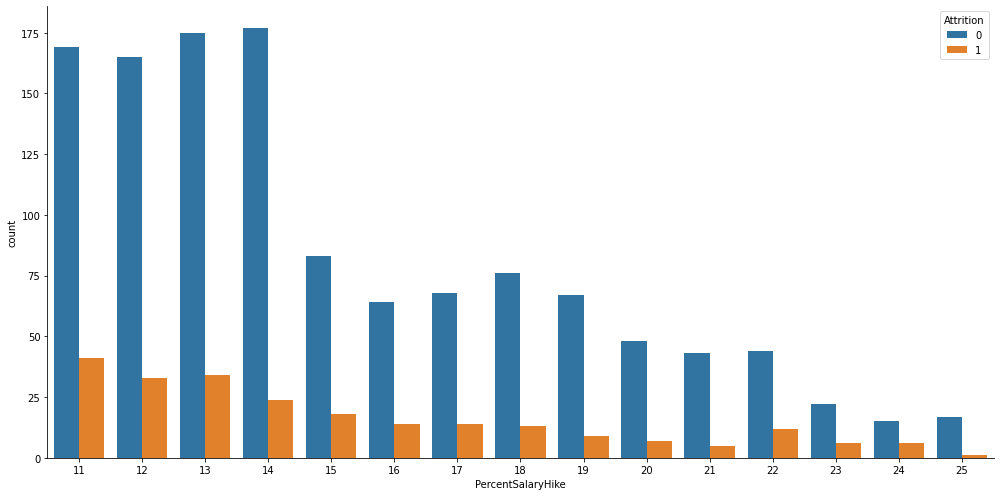

In [159]:
sns.catplot(x='PercentSalaryHike',hue='Attrition', data=df2, kind="count", height=7, aspect=2, legend=False)
plt.legend(loc='upper right', title='Attrition')
plt.tight_layout()
plt.show()